In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, parse_dates=['Month'], index_col='Month')
data.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


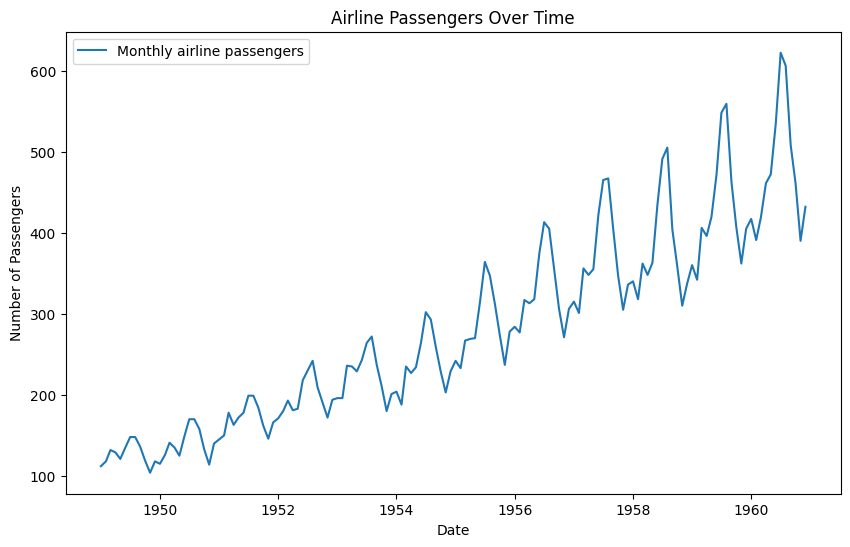

In [3]:

plt.figure(figsize=(10, 6))
plt.plot(data, label='Monthly airline passengers')
plt.title('Airline Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.savefig('timeseries_plot.png')
plt.show()


In [4]:
data['Month'] = data.index
data['Month'] = data['Month'].map(pd.Timestamp.toordinal)

# Defining the feature (X) and target (y) variables
X = data[['Month']]
y = data['Passengers']

# Splitting the data into training and test sets in proportion of 80% and 20% respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [5]:
model = LinearRegression()

# Training the model on the training data available
model.fit(X_train, y_train)


LinearRegression()

In [6]:
y_pred = model.predict(X_test)

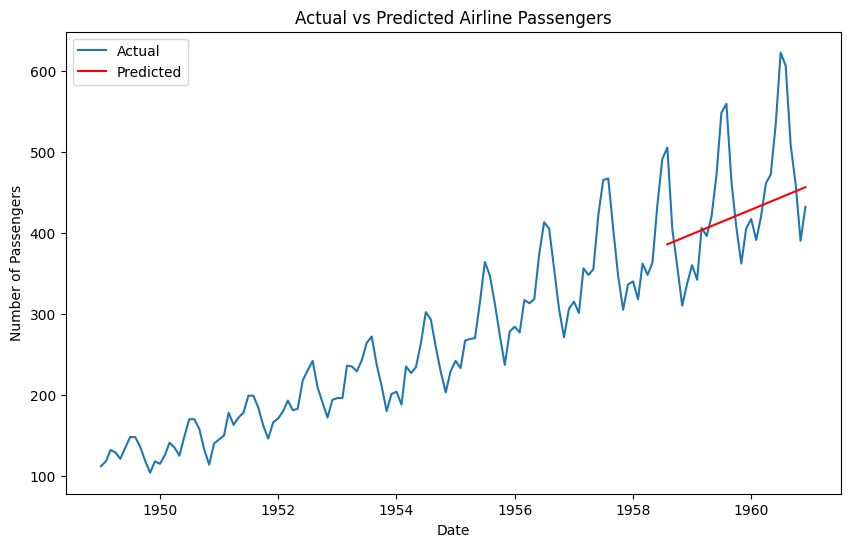

In [7]:

# Plotting the actual vs predicted values inorder to visualize model performance
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Passengers'], label='Actual')
plt.plot(X_test.index, y_pred, label='Predicted', color='red')
plt.title('Actual vs Predicted Airline Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
# Saving the plot as an image
plt.savefig('actual_vs_predicted.png')
plt.show()